In [1]:
import os
os.chdir("/home/jianrong/jianrong/test/statistic")
print(os.getcwd())

/data2/jianrong/test/statistic


In [3]:
# 加载 CSV 文件
import pandas as pd
file_path = "./metadata_final_new.csv"  # 替换为实际文件路径
data = pd.read_csv(file_path, sep='\t')


/tmp/ipykernel_1760138/2313396711.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [4]:
print("列名:", data.columns)

列名: Index(['majorType', 'cell_type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA',
       'celltype', 'age', 'barcode', 'Age_category', 'gender', 'Country',
       'ethnicity', 'patient_id', 'sample_id', 'dataset', 'condition',
       'age_category', 'age_cohorts', 'disease_cohorts', 'cohort_label'],
      dtype='object')


In [5]:
columns_to_drop = ['majorType', 'cell_type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA',
       'celltype', 'age', 'barcode','sample_id','cohort_label','dataset']

In [6]:
data = data.drop(columns=columns_to_drop)

In [7]:
print(data.head())


  Age_category  gender Country ethnicity patient_id condition  age_category  \
0          80+  Female      US     Black      cov07   Healthy            90   
1          80+  Female      US     Black      cov07   Healthy            90   
2          80+  Female      US     Black      cov07   Healthy            90   
3          80+  Female      US     Black      cov07   Healthy            90   
4          80+  Female      US     Black      cov07   Healthy            90   

  age_cohorts disease_cohorts  
0         Old         Healthy  
1         Old         Healthy  
2         Old         Healthy  
3         Old         Healthy  
4         Old         Healthy  


In [8]:
column_name = 'condition'
print(data[column_name])

0                  Healthy
1                  Healthy
2                  Healthy
3                  Healthy
4                  Healthy
                ...       
5020143    Severe/Critical
5020144    Severe/Critical
5020145    Severe/Critical
5020146    Severe/Critical
5020147    Severe/Critical
Name: condition, Length: 5020148, dtype: object


In [9]:
data_unique = data.drop_duplicates(subset = "patient_id")
print(data_unique.head())
# 计算 'sample_id' 列中唯一值的数量
unique_patient_id = data['patient_id'].nunique()

# 打印唯一的 sample_id 数量
print("唯一的 patient_id 数量:", unique_patient_id)

# 查看 'Age_category' 列的类别计数
age_category_counts = data_unique['Age_category'].value_counts()

# 打印类别计数
print(age_category_counts)


      Age_category  gender Country ethnicity patient_id condition  \
0              80+  Female      US     Black      cov07   Healthy   
5208         61-70  Female      US     White      cov08   Healthy   
10114        31-40    Male      US     White      cov09   Healthy   
14625          80+    Male      US     White      cov17   Healthy   
17839        61-70  Female      US     White      cov18   Healthy   

       age_category age_cohorts disease_cohorts  
0                90         Old         Healthy  
5208             70         Old         Healthy  
10114            40       Young         Healthy  
14625            90         Old         Healthy  
17839            70         Old         Healthy  
唯一的 patient_id 数量: 811
Age_category
51-60      140
71-80      136
61-70      117
41-50       86
31-40       79
81-90       52
21-30       50
31-39       30
41-49       20
51-59       19
71-79       19
61-69       17
91-100      14
21-29        8
81-89        5
11-20        5
11-19    

In [10]:
# 查看 'disease_cohorts' 列的类别计数
disease_cohorts_counts = data_unique['disease_cohorts'].value_counts()
# 打印类别计数
print(disease_cohorts_counts)

disease_cohorts
Cov19      552
Healthy    259
Name: count, dtype: int64


In [11]:
# 过滤掉 'disease_cohorts' 列中值为 'Healthy' 的行
data_filtered = data_unique[data_unique['disease_cohorts'] != 'Healthy']
# 查看过滤后的 DataFrame
print(data_filtered)

        Age_category  gender      Country ethnicity patient_id  \
2077330        61-70  Female  South Korea   Unknown         C8   
2081755        71-80    Male           UK   Unknown  MH9143425   
2088766        21-30  Female           UK   Unknown     CV0068   
2088768        41-50    Male           UK   Unknown     CV0059   
2094686        41-50  Female           UK   Unknown     CV0262   
...              ...     ...          ...       ...        ...   
5009061        61-70    Male           US     White   INCOV048   
5012282        51-60    Male           US     Asian   INCOV075   
5014799        71-80    Male           US     Black   INCOV008   
5015743        71-80    Male           US     White   INCOV096   
5016811        61-70    Male        China   Unknown          I   

               condition  age_category age_cohorts disease_cohorts  
2077330     Asymptomatic            70         Old           Cov19  
2081755     Asymptomatic            80         Old           Cov19  


In [14]:
# 查看 'Age_category' 列的类别计数
age_category_counts = data_filtered['Age_category'].value_counts()

# 打印类别计数
print(age_category_counts)

Age_category
51-60      100
71-80       80
61-70       74
41-50       63
31-40       48
81-90       33
21-30       29
31-39       24
71-79       18
41-49       17
51-59       17
61-69       16
91-100      11
11-19        5
81-89        5
11-20        4
21-29        4
0-6          1
101-110      1
91-99        1
Name: count, dtype: int64


In [17]:
# 删除 'Age_category' 列
data_filtered = data_filtered.drop(columns=['Age_category'])

In [18]:
data_filtered.to_csv('filtered_data.csv', index=False)
print("数据已保存到 filtered_data.csv")

数据已保存到 filtered_data.csv


变量的图

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset to ensure correct analysis
data = pd.read_csv('./filtered_data.csv')
print("列名:", data.columns)


列名: Index(['gender', 'Country', 'ethnicity', 'patient_id', 'condition',
       'age_category', 'age_cohorts', 'disease_cohorts'],
      dtype='object')


In [10]:
# Display numerical statistics using Pandas directly
numerical_stats = data.describe()

# Print the results to ensure visibility in this environment
print("Numerical Variables Statistics:")
print(numerical_stats)

# Calculate descriptive statistics for numerical variables
numerical_stats = data.describe()


Numerical Variables Statistics:
       age_category
count    552.000000
mean      61.286232
std       18.362491
min       10.000000
25%       50.000000
50%       60.000000
75%       80.000000
max      110.000000


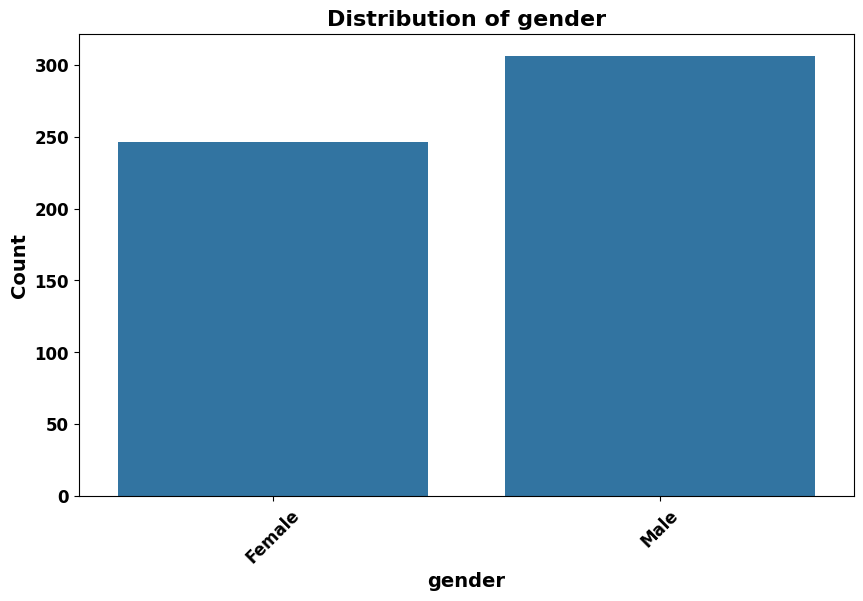

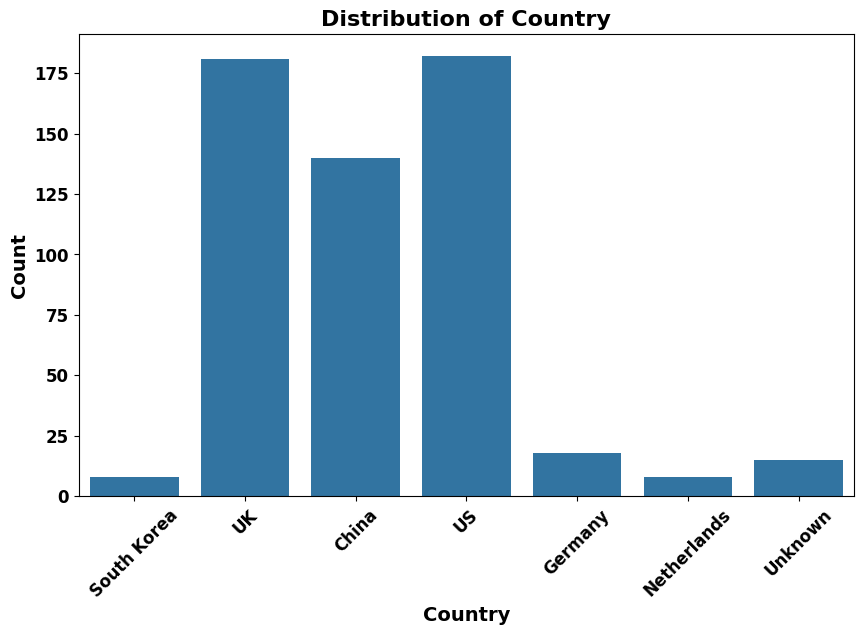

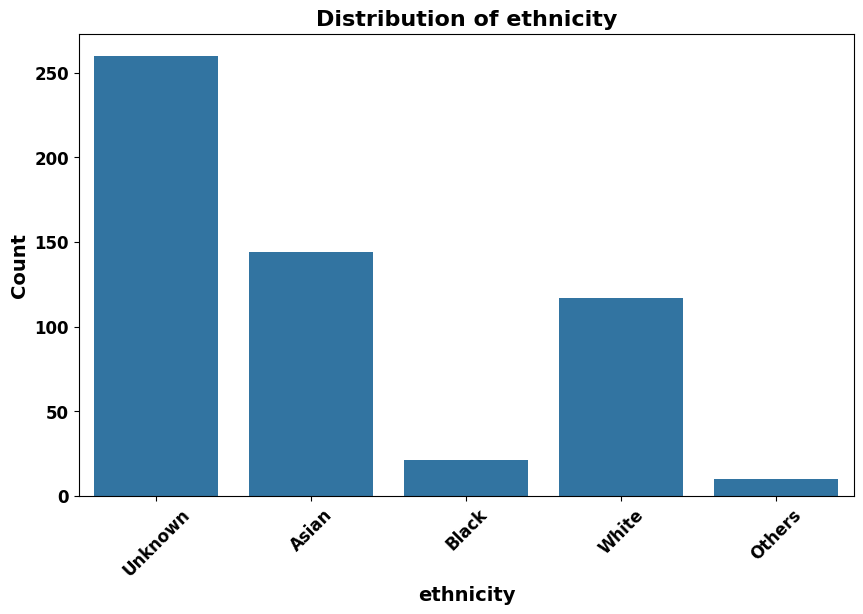

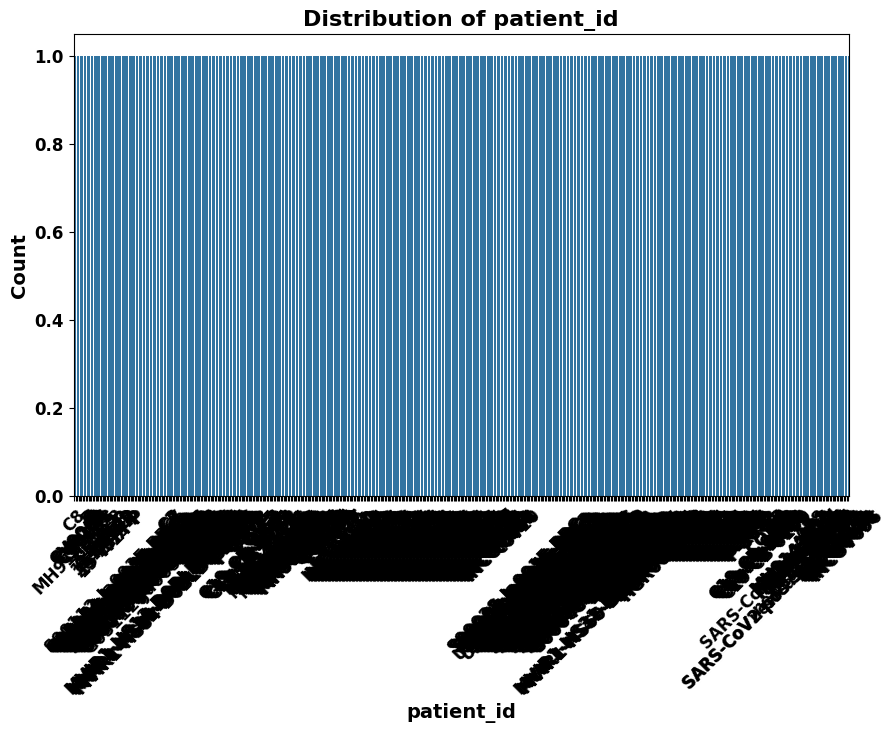

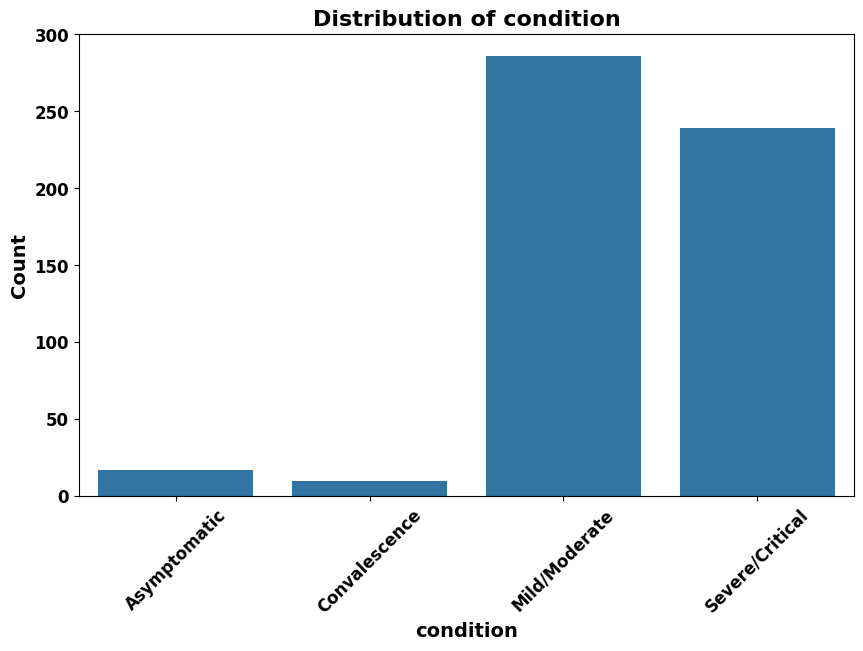

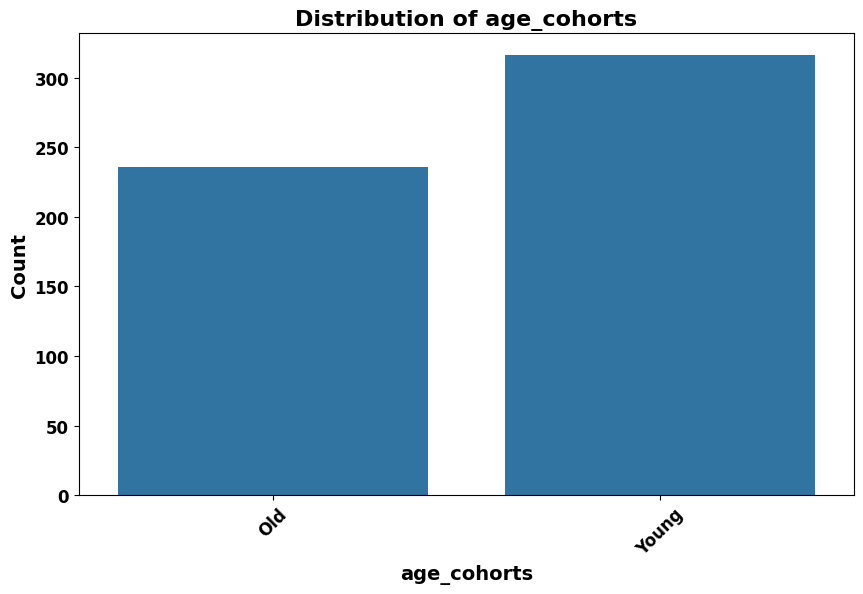

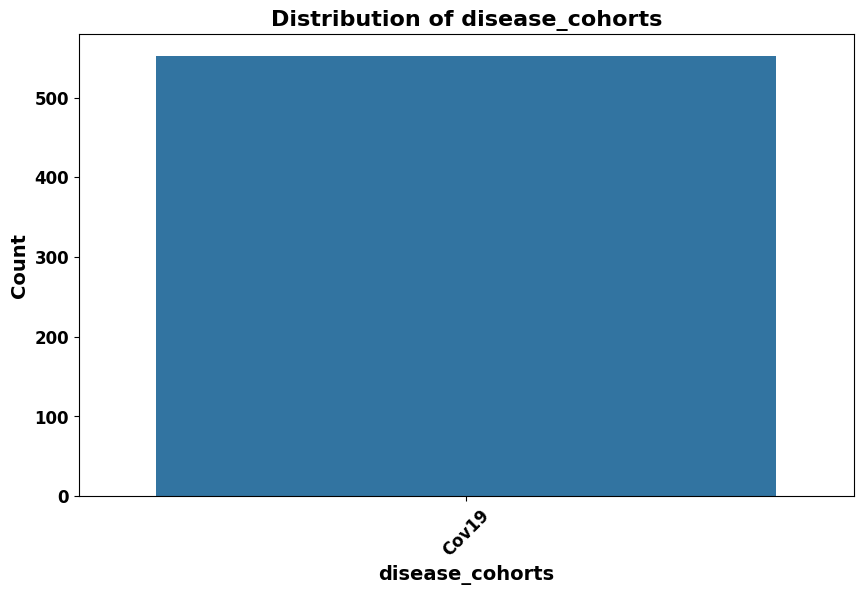

In [13]:
# Generate visualizations with enhanced font settings for axis labels and tick labels
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight='bold')
    plt.ylabel("Count", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.show()


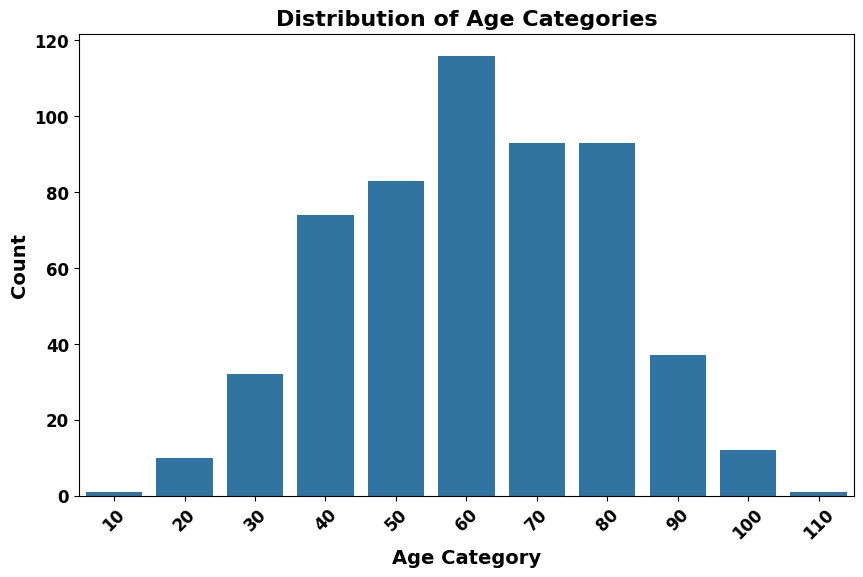

In [11]:
# Reload the dataset to include the newly uploaded file
# Generate visualization for 'age_category' variable
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', data=data)
plt.title("Distribution of Age Categories", fontsize=16, fontweight='bold')
plt.xlabel("Age Category", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()
